In [1]:
# Magic
%matplotlib inline

# Libraries in use
import os
import sys
import math
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import collections  as mc

# My libraries
sys.path.append('../infra/')
from AssetsData import AssetsData

### Try to predict 'S0000':

In [2]:
# Read the data
df = pd.read_csv("../data/train.csv")

In [3]:
# Use self-written wrapper for quicker data extraction
data         = AssetsData()
asset_df_num = data.get_asset_df_without_nan('S0000', df) #TODO some feature preprocess
y, x         = data.get_y_and_factors(asset_df_num)

In [4]:
# Lasso regression: usual regression with L1 regularization of weight vector 
clf = linear_model.Lasso(alpha=0.000001, max_iter=10000)

In [5]:
# Fit the model
clf.fit(x,y)

Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

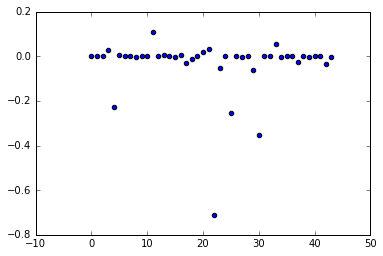

In [6]:
# Visualization of the coefficients
plt.scatter(range(len(clf.coef_)), clf.coef_)

In [7]:
# R2 statistic - percent of explained variation [0-100], so 8.7% is kind of shitty :)
clf.score(x,y)

0.087684616202970855

In [8]:
# Lets have a look at the predictions vs real data on the training dataset [at least at traning]
y_pred = clf.predict(x)

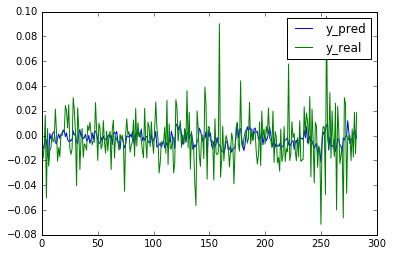

In [9]:
# Really bad picture, even though the evaluation is on the same set on which the traning was conducted
plt.plot(range(len(y_pred)), y_pred, label = 'y_pred')
plt.plot(range(len(y)), y, label = 'y_real')
plt.legend()
plt.show()